In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Configuración del entorno de trabajo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import plotly.graph_objects as go

###Importar individualmente

In [4]:
# Leemos los archivos individualmente
df_501 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/501.csv')
df_502 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/502.csv')
df_503 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/503.csv')
df_504 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/504.csv')
df_505 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/505.csv')
df_506 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/506.csv')
df_507 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/507.csv')
df_508 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/508.csv')
df_509 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/509.csv')
df_510 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/510.csv')
df_511 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/511.csv')
df_512 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/512.csv')
df_513 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/513.csv')
df_514 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/514.csv')
df_515 = pd.read_csv('/content/drive/MyDrive/Ciencia de datos e IA/archive/515.csv')

###Importar general

In [5]:
# Lista para almacenar los DataFrames individuales
dfs = []

# Ruta a los archivos CSV
file_paths = glob.glob('/content/drive/MyDrive/Ciencia de datos e IA/archive/*.csv')

# Cargamos los DataFrames individuales y se agregan a la lista
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
global_df = pd.concat(dfs, ignore_index=True)

# Mostrar información del DataFrame combinado
global_df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06,1.832560e+06
mean,-8.683814e-01,-3.178814e-02,2.244210e-02,-6.763959e-01,8.185066e-03,-3.858819e-01,3.940692e+00
std,2.756643e-01,1.556768e-01,4.279549e-01,5.596829e-01,2.707317e-01,5.087015e-01,2.912512e+00
min,-4.333252e+00,-2.031006e+00,-2.204834e+00,-7.942139e+00,-5.142578e+00,-7.593750e+00,1.000000e+00
25%,-9.909670e-01,-1.093750e-01,-2.692870e-01,-9.855960e-01,-1.132810e-01,-9.770510e-01,1.000000e+00
50%,-9.377440e-01,-1.855500e-02,-9.399400e-02,-9.357910e-01,-1.464800e-02,-1.906740e-01,3.000000e+00
75%,-8.344730e-01,5.761700e-02,3.078610e-01,-7.763700e-02,1.230470e-01,-3.174000e-03,7.000000e+00
max,3.630370e-01,1.576660e+00,1.179199e+00,3.395264e+00,5.725098e+00,3.953369e+00,8.000000e+00


###Limpieza de datos

In [6]:
global_df.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
dtype: object

In [7]:
df_501.dtypes

timestamp     object
back_x       float64
back_y       float64
back_z       float64
thigh_x      float64
thigh_y      float64
thigh_z      float64
label          int64
dtype: object

In [8]:
print('DataFrame general')
print(global_df.shape)
print(type(global_df.shape))

DataFrame general
(1832560, 8)
<class 'tuple'>


In [9]:
print('DataFrame 501')
print(df_501.shape)
print(type(df_501.shape))

DataFrame 501
(103860, 8)
<class 'tuple'>


In [10]:
print('DataFrame 515')
print(df_515.shape)
print(type(df_515.shape))

DataFrame 515
(153517, 8)
<class 'tuple'>


###Hacemos el split de los datos

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(global_df, test_size=0.2, stratify=global_df['label'])

###Valores nulos

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466048 entries, 1820670 to 952814
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   timestamp  1466048 non-null  object 
 1   back_x     1466048 non-null  float64
 2   back_y     1466048 non-null  float64
 3   back_z     1466048 non-null  float64
 4   thigh_x    1466048 non-null  float64
 5   thigh_y    1466048 non-null  float64
 6   thigh_z    1466048 non-null  float64
 7   label      1466048 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 100.7+ MB


###Valores duplicados

In [13]:
df_train[df_train.duplicated(keep=False)]

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label


###Visualización

In [14]:
global_df['label'].unique()

array([6, 3, 1, 7, 8, 5, 4])

In [15]:
label_counts = global_df['label'].value_counts()
label_counts

1    869690
7    381770
6    343198
8    178762
3     50892
5      4522
4      3726
Name: label, dtype: int64

In [16]:
# Label dictionary
label_dict = {1:'walking',3:"shiuffling",4:"stairs (ascending)",5:"stairs (descending)",6:"standing",7:"sitting",8:"lying"}
label_counts.index = label_counts.index.map(label_dict)

# Create a Pie trace using plotly.graph_objects
trace = go.Pie(labels=label_counts.index, values=label_counts.values)

# Create a layout (optional)
layout = go.Layout(title='Densidad en porcentaje')

# Create a Figure
fig = go.Figure(data=[trace], layout=layout)

# Display the figure
fig.show()

In [17]:
trace = go.Bar(y=label_counts.values, x=label_counts.index)

# Creating the layout
layout = go.Layout(title='Densidad en cantidad')

# Creating the figure
fig = go.Figure(data=[trace], layout=layout)

# Displaying the figure
fig.show()

<Axes: title={'center': 'Análisis de correlación'}>

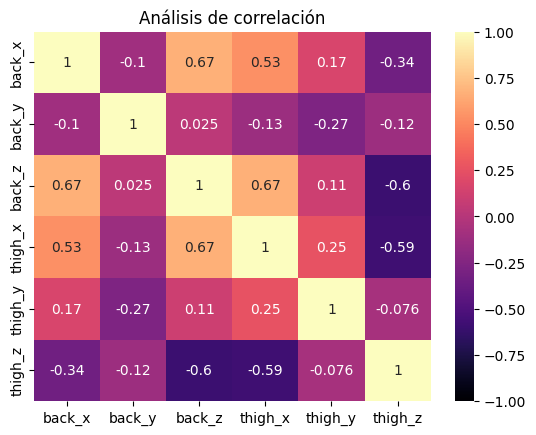

In [18]:
# Análisis de correlación
plt.title('Análisis de correlación')
sns.heatmap(df_train.drop(['timestamp', 'label'], axis=1).corr(), vmin=-1, vmax=1, cmap='magma', annot=True)

In [19]:
# Divide data by activity
walking_df = global_df.loc[global_df['label'] == 1]
shuffling_df = global_df.loc[global_df['label'] == 3]
stairs_ascending_df = global_df.loc[global_df['label'] == 4]
stairs_descending_df = global_df.loc[global_df['label'] == 5]
standing_df = global_df.loc[global_df['label'] == 6]
sitting_df = global_df.loc[global_df['label'] == 7]
lying_df = global_df.loc[global_df['label'] == 8]

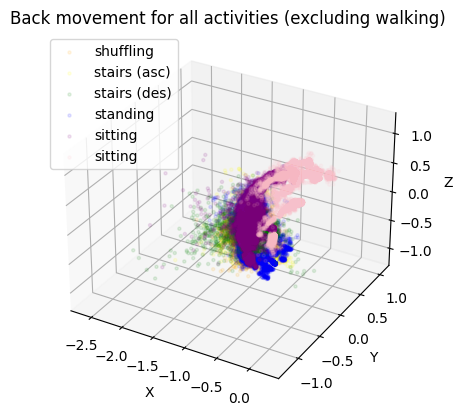

In [ ]:
# Plot back movement for all activities (excluding walking)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('Back movement for all activities (excluding walking)')
ax.scatter(shuffling_df.back_x, shuffling_df.back_y, shuffling_df.back_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_ascending_df.back_x, stairs_ascending_df.back_y, stairs_ascending_df.back_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_descending_df.back_x, stairs_descending_df.back_y, stairs_descending_df.back_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.back_x, standing_df.back_y, standing_df.back_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.back_x, sitting_df.back_y, sitting_df.back_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.back_x, lying_df.back_y, lying_df.back_z, color='pink', label='sitting', alpha=0.1, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()

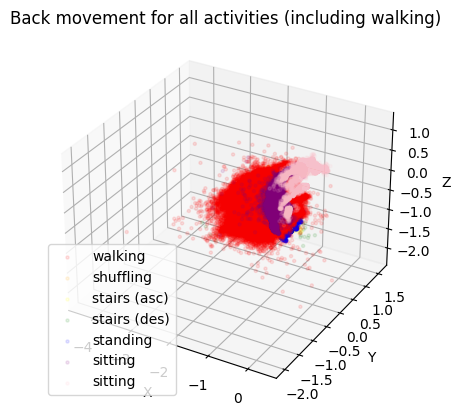

In [ ]:
# Plot back movement for all activities (including walking)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('Back movement for all activities (including walking)')
ax.scatter(walking_df.back_x, walking_df.back_y, walking_df.back_z, color='red', label='walking', alpha=0.1, marker='.')
ax.scatter(shuffling_df.back_x, shuffling_df.back_y, shuffling_df.back_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_ascending_df.back_x, stairs_ascending_df.back_y, stairs_ascending_df.back_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_descending_df.back_x, stairs_descending_df.back_y, stairs_descending_df.back_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.back_x, standing_df.back_y, standing_df.back_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.back_x, sitting_df.back_y, sitting_df.back_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.back_x, lying_df.back_y, lying_df.back_z, color='pink', label='sitting', alpha=0.1, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()

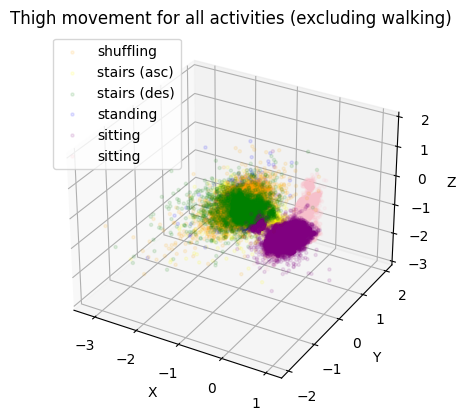

In [ ]:
# Plot thigh movement for all activities (excluding walking)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('Thigh movement for all activities (excluding walking)')
ax.scatter(shuffling_df.thigh_x, shuffling_df.thigh_y, shuffling_df.thigh_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_ascending_df.thigh_x, stairs_ascending_df.thigh_y, stairs_ascending_df.thigh_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_descending_df.thigh_x, stairs_descending_df.thigh_y, stairs_descending_df.thigh_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.thigh_x, standing_df.thigh_y, standing_df.thigh_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.thigh_x, sitting_df.thigh_y, sitting_df.thigh_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.thigh_x, lying_df.thigh_y, lying_df.thigh_z, color='pink', label='sitting', alpha=0.1, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



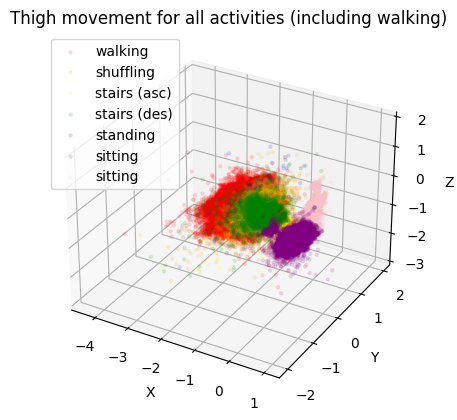

In [ ]:
# Plot thigh movement for all activities (including walking)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('Thigh movement for all activities (including walking)')
ax.scatter(walking_df.back_x, walking_df.back_y, walking_df.back_z, color='red', label='walking', alpha=0.1, marker='.')
ax.scatter(shuffling_df.thigh_x, shuffling_df.thigh_y, shuffling_df.thigh_z, color='orange', label='shuffling', alpha=0.1, marker='.')
ax.scatter(stairs_ascending_df.thigh_x, stairs_ascending_df.thigh_y, stairs_ascending_df.thigh_z, color='yellow', label='stairs (asc)', alpha=0.1, marker='.')
ax.scatter(stairs_descending_df.thigh_x, stairs_descending_df.thigh_y, stairs_descending_df.thigh_z, color='green', label='stairs (des)', alpha=0.1, marker='.')
ax.scatter(standing_df.thigh_x, standing_df.thigh_y, standing_df.thigh_z, color='blue', label='standing', alpha=0.1, marker='.')
ax.scatter(sitting_df.thigh_x, sitting_df.thigh_y, sitting_df.thigh_z, color='purple', label='sitting', alpha=0.1, marker='.')
ax.scatter(lying_df.thigh_x, lying_df.thigh_y, lying_df.thigh_z, color='pink', label='sitting', alpha=0.1, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()